# Atividade de Regressão
- Faça uma regressão linear com as variáveis numéricas sem pré-processamento e usando amostragem houldout. Qual o R2?
- Faça uma regressão linear com as variáveis numéricas sem pré-processamento e usando validação cruzada. Qual o R2?
- Analise a correlação das variaveis e escolha 3 para variaveis preditivas. Refaça a regressão com validação cruzada. Qual o R2?
- Como ficaria o R2 se fizessemos regressão apenas com a variável mais correlacionada com o atributo alvo? vale a pena?
- Faça o pré-processamento necessário e refaça a regressão com validação cruzada. Qual o R2?
    - Precisa ajustar dados faltosos?
    - Precisa remover outliers?
    - Precisa fazer normalização?
    - Aplique uma tecnica de agregação de atributos e verifique o R2.

- Qual o melhor modelo para o problema apresentado? Qual o melhor R2 que você conseguiu com validação cruzada?



In [129]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Amostragem com Houldout

In [130]:
# Faça uma regressão linear com as variáveis numéricas sem pré-processamento e usando amostragem houldout. Qual o R2?

from sklearn.model_selection import train_test_split

carData = df[['MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']]
targetData = df[['CO2EMISSIONS']]

# Amostragem houldout
x_train, x_test, y_train, y_test = train_test_split(carData, targetData, test_size=0.3)

# Regressão linear
reg = LinearRegression()
reg.fit(x_train, y_train)

# Função de predição
pred = reg.predict(x_test)

print(f'R2: {metrics.r2_score(y_test, pred)}')

R2: 0.8764903316812623


## Validação cruzada

In [131]:
# Faça uma regressão linear com as variáveis numéricas sem pré-processamento e usando validação cruzada. Qual o R2?

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

carData = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']]
targetData = df[['CO2EMISSIONS']]

# Separação dos folds para validação cruzada 
# Sem estratificação, pois y é contínuo
kFold = KFold(n_splits=10)

# Regressão linear com validação cruzada
predictedCO2 = cross_val_predict(LinearRegression(), carData, targetData, cv=kFold)

print(f'R2: {metrics.r2_score(targetData, predictedCO2)}')

R2: 0.883242363736205


## Correlação de variáveis

### 3 variáveis


R2: 0.8807954333463508


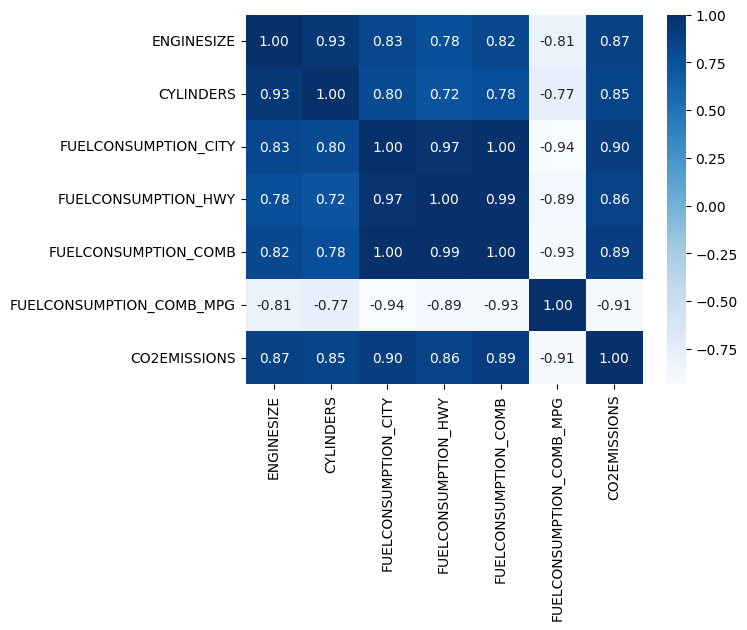

In [132]:
# Analise a correlação das variaveis e escolha 3 para variaveis preditivas. Refaça a regressão com validação cruzada. Qual o R2?
import seaborn as sb

dataNumeric = pd.concat([carData, targetData], axis=1)

correlation = dataNumeric.corr()
sb.heatmap(correlation, annot=True, fmt=".2f", cmap='Blues')

#best_car_data = df[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB', 'ENGINESIZE']]
best_car_data = df[['FUELCONSUMPTION_COMB_MPG', 'ENGINESIZE', 'CYLINDERS']]

kFold = KFold(n_splits=10)
predictedCO2 = cross_val_predict(LinearRegression(), best_car_data, targetData, cv=kFold)

print()
print(f'R2: {metrics.r2_score(targetData, predictedCO2)}')

In [133]:
# Uso de memória de cada coluna
memoriaAntes = df.memory_usage().sum() / 1024
memoriaDepois = best_car_data.memory_usage().sum() / 1024

print(f"Antes: {memoriaAntes:.2f} kB")
print(f"Depois: {memoriaDepois:.2f} kB")
print(f"Redução: {(1 - memoriaDepois/memoriaAntes) * 100:.2f}%")

Antes: 108.50 kB
Depois: 25.14 kB
Redução: 76.83%


Como mostrado no gráfico de calor, os valores envolvidos no consumo de combustível têm alta correlação entre si, o que torna redundante usá-los todos ao mesmo tempo. Por isso, as características adotadas como mais relevantes para a regressãos serão: *FUELCONSUMPTION_COMB_MPG*, *ENGINESIZE* e *CYLINDERS*.

A nova pontuação de $R^2$ mostrou como estas variáveis sozinha já descrevem o comportamento sem a necessidade das demais características, trazendo uma redução de acuracidade percebida apenas na terceira casa decimal. Além disso, levando em conta o uso de memória de cada coluna, o custo total passa de 108,49 kB para 25,14 kB, representando uma redução de 76,83%, muito relevante para a escalabilidade do DataSet.

### 1 variável

In [134]:
# Como ficaria o R2 se fizessemos regressão apenas com a variável mais correlacionada com o atributo alvo? vale a pena?

best_car_data = df[['FUELCONSUMPTION_COMB_MPG']]

predictedCO2 = cross_val_predict(LinearRegression(), best_car_data, targetData, cv=20)

reg = LinearRegression()
reg.fit(x_train, y_train)
pred = reg.predict(x_test)

print(f'R2: {metrics.r2_score(targetData, predictedCO2)}')

R2: 0.8180723634474896


In [135]:
print(f"{best_car_data.memory_usage().sum() / 1024:.2f} kB")

8.46 kB


Observa-se que restringir os dados de entrada para apenas a coluna mais correlacionada trás uma diminuição de, aproximadamente, 0.07 para a pontuação do $R^2$. Em contrapartida, o consumo de memória reduz para apenas 8,46 kB.

Esta estratégia pode ser ideal em cenários onde o baixo consumo de memória é um requisito, visto que o novo valor de $R^2$ ainda é um indicativo de um bom modelo.

Para casos em que a economia de memória não é estritamente necessária, acredito que o modelo com as 3 variáveis mais relevantes se posiciona como o melhor ponto do trade-off entre acurácia e memória.

## Pré-Processamento

In [136]:
# Faça o pré-processamento necessário e refaça a regressão com validação cruzada. Qual o R2?

from sklearn.preprocessing import StandardScaler

dataNumeric = pd.concat([carData, targetData], axis=1)

# Remoção dos outliers
q1 = dataNumeric.quantile(0.25)
q3 = dataNumeric.quantile(0.75)
iqr = q3 - q1
lLim = q1 - 1.5 * iqr
hLim = q3 + 1.5 * iqr

for col in dataNumeric.columns:
    dataNumeric.loc[dataNumeric[col] < lLim[col], col] = lLim[col]
    dataNumeric.loc[dataNumeric[col] > hLim[col], col] = hLim[col]

# Normalização
scaler = StandardScaler()
dataNumeric = pd.DataFrame(scaler.fit_transform(dataNumeric), columns=dataNumeric.columns)

best_car_data = dataNumeric[['FUELCONSUMPTION_COMB_MPG', 'ENGINESIZE', 'CYLINDERS']]
targetData = dataNumeric[['CO2EMISSIONS']]

# Regressão
predictedCO2 = cross_val_predict(LinearRegression(), best_car_data, targetData, cv=20)

reg = LinearRegression()
reg.fit(x_train, y_train)
pred = reg.predict(x_test)

print(f'R2: {metrics.r2_score(targetData, predictedCO2)}')

C:\Users\phaa2\AppData\Local\Temp\ipykernel_1944\2341844093.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '76.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataNumeric.loc[dataNumeric[col] < lLim[col], col] = lLim[col]


R2: 0.8852043014895117


In [137]:
# Getdummers